# Dog vs Cat Image Classifier

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
print("my current directory: "+os.getcwd())  # getting current directory
path=os.getcwd()                            # storing current directory in path string
training_path=os.path.join(path,'Downloads\image_classifier\\training_set')    
test_path=os.path.join(path,'Downloads\image_classifier\\test_set')
print("training_path: "+training_path)
print("test_path: "+test_path)

my current directory: C:\Users\user
training_path: C:\Users\user\Downloads\image_classifier\training_set
test_path: C:\Users\user\Downloads\image_classifier\test_set


In [3]:
os.chdir(r'C:\Users\user\Downloads\image_classifier\training_set\dogs')   # changing from current directory to training_dog
dog_images=os.listdir()  # storing the names of the images 
os.chdir(r'C:\Users\user\Downloads\image_classifier\training_set\cats')   #  changing from current directory to training_cat
cat_images=os.listdir()  # storing the names of the images
print("dog_images: " +str(dog_images[:5]))  # printing out some of the names
print("cat_images: " +str(cat_images[:5]))

dog_images: ['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg']
cat_images: ['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg']


In [4]:
print("No. of dog images: "+str(len(dog_images)) )   
print("No. of cat images: "+str(len(cat_images)) )

No. of dog images: 4006
No. of cat images: 4001


# plotting some of the dogs images from the directory

Text(0.5, 1.0, 'shape: (199, 187, 3)')

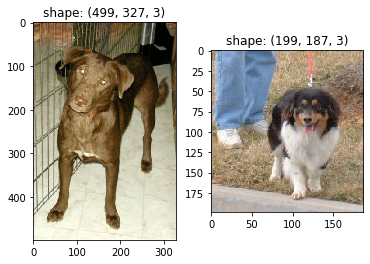

In [5]:
os.chdir(r'C:\Users\user\Downloads\image_classifier\training_set\dogs')  
image_1=mpimg.imread('dog.1.jpg')
image_2=mpimg.imread('dog.2.jpg')
plt.subplot(1,2,1)
plt.imshow(image_1)
plt.title("shape: " +str(image_1.shape))
plt.subplot(1,2,2)
plt.imshow(image_2)
plt.title("shape: "+str(image_2.shape)) 

# plotting some of the dogs images from the directory

Text(0.5, 1.0, 'shape: (396, 312, 3)')

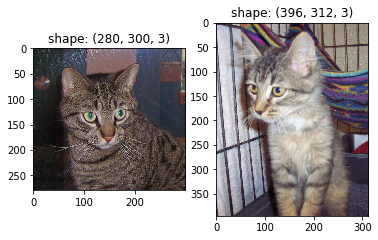

In [6]:
os.chdir(r'C:\Users\user\Downloads\image_classifier\training_set\cats')
image_1=mpimg.imread('cat.1.jpg')
image_2=mpimg.imread('cat.2.jpg')
plt.subplot(1,2,1)
plt.imshow(image_1)
plt.title("shape: " +str(image_1.shape))
plt.subplot(1,2,2)
plt.imshow(image_2)
plt.title("shape: "+str(image_2.shape)) 

# forming an image and label data set using ImageDataGenerator and Flow_from_directory

In [33]:
train_datagen=ImageDataGenerator(rescale=1./255) # rescaling the images
test_datagen=ImageDataGenerator(rescale=1./255)
train_set=train_datagen.flow_from_directory(training_path,target_size=(100,100),batch_size=50,class_mode='binary')
test_set=test_datagen.flow_from_directory(test_path,target_size=(100,100),batch_size=50,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# As we selected the batch size of 50 images. Using the next function we can extract the images as a group of 50 

 As we can see that label 0 is for cat and 1 is for dogs
{'cats': 0, 'dogs': 1}


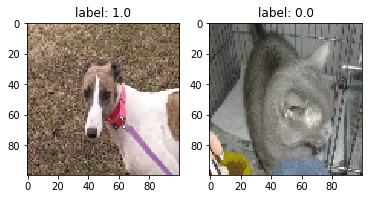

In [34]:

images,label=next(train_set) # extracting images as a group of 50 using next which gives lists of numoy arrays and labels
plt.subplot(1,2,1) 
plt.imshow(images[1])  # showing the 2nd image that's why the index is 1
plt.title("label: "+str(label[1]))
plt.subplot(1,2,2)
plt.imshow(images[6])   # showing the 7th image corresponding to index 7
plt.title("label: "+str(label[6]))
print(" As we can see that label 0 is for cat and 1 is for dogs")
print(test_set.class_indices)


In [35]:
# NA --> No. Image Augmentation 
model_NA=tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                  
    
    
    
])

In [10]:
#model.summary()

In [36]:
from tensorflow.keras.optimizers import RMSprop
model_NA.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [46]:
history_NA=model_NA.fit_generator(train_set,epochs=5,validation_data=(test_set))

Epoch 1/5
161/161 [==============================] - 54s 338ms/step - loss: 0.2646 - acc: 0.8927 - val_loss: 0.6201 - val_acc: 0.7593
Epoch 2/5
161/161 [==============================] - 54s 334ms/step - loss: 0.1933 - acc: 0.9222 - val_loss: 0.7374 - val_acc: 0.7617
Epoch 3/5
161/161 [==============================] - 55s 339ms/step - loss: 0.1374 - acc: 0.9489 - val_loss: 0.6887 - val_acc: 0.7454
Epoch 4/5
161/161 [==============================] - 55s 339ms/step - loss: 0.0884 - acc: 0.9699 - val_loss: 0.9163 - val_acc: 0.7504
Epoch 5/5
161/161 [==============================] - 55s 339ms/step - loss: 0.0686 - acc: 0.9791 - val_loss: 1.0166 - val_acc: 0.7509


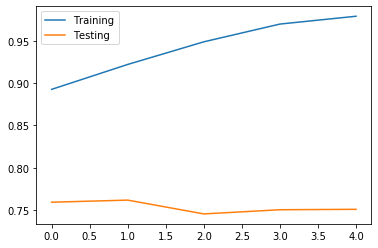

In [47]:
# plotting the training as well as test accuracy 
plt.plot(history_NA.history['acc'])
plt.plot(history_NA.history['val_acc'])
plt.legend(['Training','Testing'])

# Image Augmentation

In [39]:
train_datagen_A=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen_A=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest'
                                 )
train_set_A=train_datagen_A.flow_from_directory(training_path,target_size=(100,100),batch_size=50,class_mode='binary')
test_set_A=test_datagen_A.flow_from_directory(test_path,target_size=(100,100),batch_size=50,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


 As we can see that label 0 is for cat and 1 is for dogs
{'cats': 0, 'dogs': 1}


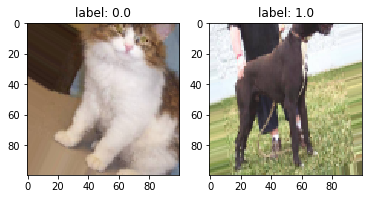

In [40]:
images,label=next(train_set_A)
plt.subplot(1,2,1)
plt.imshow(images[1])
plt.title("label: "+str(label[1]))
plt.subplot(1,2,2)
plt.imshow(images[6])
plt.title("label: "+str(label[6]))
print(" As we can see that label 0 is for cat and 1 is for dogs")
print(test_set.class_indices)

In [42]:
# when we are applying Image Augmentation
model_A=tf.keras.models.Sequential([ tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                  
    
    
    
])

In [43]:
model_A.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [48]:
history_A=model_A.fit_generator(train_set,epochs=5,validation_data=(test_set))

Epoch 1/5
161/161 [==============================] - 117s 724ms/step - loss: 0.2644 - acc: 0.8842 - val_loss: 0.5502 - val_acc: 0.7652
Epoch 2/5
161/161 [==============================] - 150s 933ms/step - loss: 0.1909 - acc: 0.9239 - val_loss: 0.7562 - val_acc: 0.7341
Epoch 3/5
161/161 [==============================] - 161s 999ms/step - loss: 0.1277 - acc: 0.9525 - val_loss: 0.7969 - val_acc: 0.7711
Epoch 4/5
161/161 [==============================] - 159s 986ms/step - loss: 0.0826 - acc: 0.9720 - val_loss: 0.8953 - val_acc: 0.7588
Epoch 5/5
161/161 [==============================] - 152s 947ms/step - loss: 0.0504 - acc: 0.9835 - val_loss: 1.7120 - val_acc: 0.7257


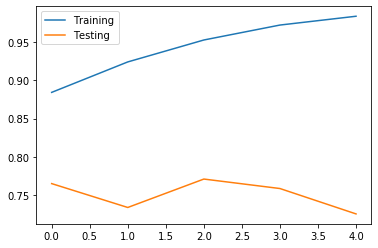

In [49]:
plt.plot(history_A.history['acc'])
plt.plot(history_A.history['val_acc'])
plt.legend(['Training','Testing'])